# 1. Import and Install Dependencies

In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7150372213082577173
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5711593472
locality {
  bus_id: 1
  links {
  }
}
incarnation: 370063862224069596
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


# 2. Keypoints using MP Holistic

In [10]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [12]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [13]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=0), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=0)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [14]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'mediapipe_detection' is not defined

In [63]:
draw_landmarks(frame, results)

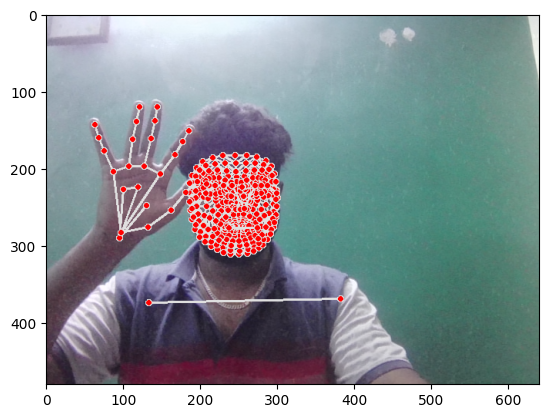

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [64]:
len(results.left_hand_landmarks.landmark)

21

In [65]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [66]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [67]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [68]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [69]:
result_test = extract_keypoints(results)

In [70]:
result_test

array([ 0.49057424,  0.26885542, -0.61695737, ...,  0.48778334,
        0.72110111, -0.02912544])

In [71]:
np.save('0', result_test)

In [72]:
np.load('0.npy')

array([ 0.49057424,  0.26885542, -0.61695737, ...,  0.48778334,
        0.72110111, -0.02912544])

# 4. Setup Folders for Collection

In [18]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join(r"D:\SEM8\Sign Language Project\media pipe model\video_dataset") 

# Folder containing one video per class
class_videos_folder = r"D:\SEM8\Sign Language Project\media pipe model\Video_data"  # Change to your folder path
class_video_paths = [os.path.join(class_videos_folder, filename) for filename in os.listdir(class_videos_folder) if filename.endswith(('.mp4', '.avi'))]

# Set number of sequences and frame length
no_sequences = 80  # 80 sequences per class

# Function to make detections
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model.process(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

# Function to draw landmarks
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros((33, 3))
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]) if results.face_landmarks else np.zeros((468, 3))
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros((21, 3))
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]) if results.right_hand_landmarks else np.zeros((21, 3))
    return np.concatenate([pose, face, lh, rh])

# 5. Collect Keypoint Values for Training and Testing

In [20]:
##Use this for run whole video without any frame length
# Initialize MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('OpenCV Feed', 1280, 720)
    
    # Loop through each class video in the folder
    for class_video_path in class_video_paths:
        # Extract class name from video filename
        class_name = os.path.basename(class_video_path).split('.')[0]  # Using video name as class name
        
        # Create directories for each class (if not already created)
        class_folder_path = os.path.join(DATA_PATH, class_name)
        os.makedirs(class_folder_path, exist_ok=True)
        
        # Create subfolders for each sequence
        for sequence in range(no_sequences):
            sequence_path = os.path.join(class_folder_path, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)

        cap = cv2.VideoCapture(class_video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames == 0:
            print(f"Warning: Video {class_video_path} has no frames. Skipping...")
            cap.release()
            continue
        
        # Process video for each sequence
        for sequence in range(no_sequences):
            frame_count = 0
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Start from the first frame

            while frame_count < total_frames:
                ret, frame = cap.read()
                if not ret:
                    break  # Stop if video ends unexpectedly

                # Apply mirror effect (optional)
                frame = cv2.flip(frame, 1)

                # Make detections
                frame, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(frame, results)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(class_folder_path, str(sequence), str(frame_count))
                np.save(npy_path, keypoints)

                # Increment frame counter
                frame_count += 1

                # Display the frame
                cv2.putText(frame, f'Collecting frames for {class_name} Sequence {sequence}', (15, 12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', frame)
                cv2.waitKey(1)

        cap.release()

    cv2.destroyAllWindows()

In [56]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join(r"D:\SEM8\Sign Language Project\media pipe model\frame_30") 

# Folder containing one video per class
class_videos_folder = r"D:\SEM8\Sign Language Project\media pipe model\Video_data"
class_video_paths = [os.path.join(class_videos_folder, filename) for filename in os.listdir(class_videos_folder) if filename.endswith(('.mp4', '.avi'))]

# Set number of sequences and sequence length
no_sequences = 30  # 30 sequences
sequence_length = 30  # Each sequence has 30 frames

# Function to extract keypoints and ensure correct shape (1662,)
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    
    keypoints = np.concatenate([pose, face, lh, rh])  # Final shape should be (1662,)
    return keypoints

# Function to process a frame with MediaPipe
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

# Function to draw landmarks
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Initialize MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('OpenCV Feed', 1280, 720)
    
    # Loop through each class video in the folder
    for class_video_path in class_video_paths:
        class_name = os.path.basename(class_video_path).split('.')[0]  # Extract class name
        
        # Create directory for class
        class_folder_path = os.path.join(DATA_PATH, class_name)
        os.makedirs(class_folder_path, exist_ok=True)
        
        cap = cv2.VideoCapture(class_video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frames_per_sequence = max(1, total_frames // sequence_length)  # Ensure at least 1 frame per step
        
        for sequence in range(no_sequences):
            sequence_path = os.path.join(class_folder_path, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)
            
            frame_count = 0
            frame_idx = 0
            sequence_data = []  # Store frames in sequence
            
            while cap.isOpened() and frame_count < sequence_length:
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
                ret, frame = cap.read()
                if not ret:
                    break  

                frame = cv2.flip(frame, 1)  # Apply mirror effect (optional)
                frame, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(frame, results)

                # Extract and store keypoints
                keypoints = extract_keypoints(results)
                sequence_data.append(keypoints)  # Append to sequence
                
                npy_path = os.path.join(sequence_path, f"{frame_count}.npy")
                np.save(npy_path, keypoints)

                frame_count += 1
                frame_idx += frames_per_sequence

                # Display the frame
                cv2.putText(frame, f'Collecting frames for {class_name} Sequence {sequence}', (15, 12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', frame)
                cv2.waitKey(1)
            
            sequence_data = np.array(sequence_data)
            print(f"Saved sequence {sequence} for class {class_name} - Shape: {sequence_data.shape}")  # Should print (30, 1662)

        cap.release()
    
    cv2.destroyAllWindows()
import os
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Path for exported data, numpy arrays
DATA_PATH = os.path.join(r"D:\SEM8\Sign Language Project\media pipe model\frame_31") 

# Folder containing one video per class
class_videos_folder = r"D:\SEM8\Sign Language Project\media pipe model\Video_data"
class_video_paths = [os.path.join(class_videos_folder, filename) for filename in os.listdir(class_videos_folder) if filename.endswith(('.mp4', '.avi'))]

# Set number of sequences and sequence length
no_sequences = 30  # 30 sequences
sequence_length = 30  # Each sequence has 30 frames

# Function to extract keypoints and ensure correct shape (1662,)
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    
    keypoints = np.concatenate([pose, face, lh, rh])  # Final shape should be (1662,)
    return keypoints

# Function to process a frame with MediaPipe
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results

# Function to draw landmarks
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Initialize MediaPipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
    cv2.resizeWindow('OpenCV Feed', 1280, 720)
    
    # Loop through each class video in the folder
    for class_video_path in class_video_paths:
        class_name = os.path.basename(class_video_path).split('.')[0]  # Extract class name
        
        # Create directory for class
        class_folder_path = os.path.join(DATA_PATH, class_name)
        os.makedirs(class_folder_path, exist_ok=True)
        
        cap = cv2.VideoCapture(class_video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frames_per_sequence = max(1, total_frames // sequence_length)  # Ensure at least 1 frame per step
        
        for sequence in range(no_sequences):
            sequence_path = os.path.join(class_folder_path, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)
            
            frame_count = 0
            frame_idx = 0
            sequence_data = []  # Store frames in sequence
            
            while cap.isOpened() and frame_count < sequence_length:
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
                ret, frame = cap.read()
                if not ret:
                    break  

                frame = cv2.flip(frame, 1)  # Apply mirror effect (optional)
                frame, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(frame, results)

                # Extract and store keypoints
                keypoints = extract_keypoints(results)
                sequence_data.append(keypoints)  # Append to sequence
                
                npy_path = os.path.join(sequence_path, f"{frame_count}.npy")
                np.save(npy_path, keypoints)

                frame_count += 1
                frame_idx += frames_per_sequence

                # Display the frame
                cv2.putText(frame, f'Collecting frames for {class_name} Sequence {sequence}', (15, 12), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', frame)
                cv2.waitKey(1)
            
            sequence_data = np.array(sequence_data)
            print(f"Saved sequence {sequence} for class {class_name} - Shape: {sequence_data.shape}")  # Should print (30, 1662)

        cap.release()
    
    cv2.destroyAllWindows()


Saved sequence 0 for class beautiful - Shape: (30, 1662)
Saved sequence 1 for class beautiful - Shape: (30, 1662)
Saved sequence 2 for class beautiful - Shape: (30, 1662)
Saved sequence 3 for class beautiful - Shape: (30, 1662)
Saved sequence 4 for class beautiful - Shape: (30, 1662)
Saved sequence 5 for class beautiful - Shape: (30, 1662)
Saved sequence 6 for class beautiful - Shape: (30, 1662)
Saved sequence 7 for class beautiful - Shape: (30, 1662)
Saved sequence 8 for class beautiful - Shape: (30, 1662)
Saved sequence 9 for class beautiful - Shape: (30, 1662)
Saved sequence 10 for class beautiful - Shape: (30, 1662)
Saved sequence 11 for class beautiful - Shape: (30, 1662)
Saved sequence 12 for class beautiful - Shape: (30, 1662)
Saved sequence 13 for class beautiful - Shape: (30, 1662)
Saved sequence 14 for class beautiful - Shape: (30, 1662)
Saved sequence 15 for class beautiful - Shape: (30, 1662)
Saved sequence 16 for class beautiful - Shape: (30, 1662)
Saved sequence 17 for cl

In [45]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [73]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [74]:
import os
dataset_path = r"D:\SEM8\Sign Language Project\media pipe model\frame_31"
# Folder start
actions = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]


# Create a label_map using folder names as actions
label_map = {label:num for num, label in enumerate(actions)}

# Print to verify
print("Actions:", actions)
print("Label Map:", label_map)


Actions: ['beautiful', 'camera', 'car', 'face', 'family', 'flower', 'foolish', 'friday', 'house', 'how', 'marry', 'monday', 'place', 'sunday', 'table', 'Thursday', 'time', 'tree', 'tuesday', 'wednesday', 'what', 'work']
Label Map: {'beautiful': 0, 'camera': 1, 'car': 2, 'face': 3, 'family': 4, 'flower': 5, 'foolish': 6, 'friday': 7, 'house': 8, 'how': 9, 'marry': 10, 'monday': 11, 'place': 12, 'sunday': 13, 'table': 14, 'Thursday': 15, 'time': 16, 'tree': 17, 'tuesday': 18, 'wednesday': 19, 'what': 20, 'work': 21}


In [75]:
print(type(actions))
print(actions[0])

<class 'list'>
beautiful


In [76]:
label_map

{'beautiful': 0,
 'camera': 1,
 'car': 2,
 'face': 3,
 'family': 4,
 'flower': 5,
 'foolish': 6,
 'friday': 7,
 'house': 8,
 'how': 9,
 'marry': 10,
 'monday': 11,
 'place': 12,
 'sunday': 13,
 'table': 14,
 'Thursday': 15,
 'time': 16,
 'tree': 17,
 'tuesday': 18,
 'wednesday': 19,
 'what': 20,
 'work': 21}

In [77]:
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30
dataset_path = r"D:\SEM8\Sign Language Project\media pipe model\frame_30"
# Folder start
actions = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(dataset_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(dataset_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [78]:
keypoints = extract_keypoints(results)
print(f"Keypoints Shape: {keypoints.shape}")  # Should print (1662,)


Keypoints Shape: (1662,)


In [79]:
np.array(sequences).shape

(660, 30, 1662)

In [80]:
np.array(labels).shape

(660,)

In [81]:
X = np.array(sequences)

In [82]:
X.shape

(660, 30, 1662)

In [83]:
y = to_categorical(labels).astype(int)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [85]:
y_test.shape

(33, 22)

# 7. Build and Train LSTM Neural Network

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [97]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [98]:
model = Sequential()
import numpy as np
dataset_path = r"D:\SEM8\Sign Language Project\media pipe model\frame_30"

actions = np.array([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))  # Use len(actions) instead of actions.shape[0]


In [99]:
res = [.7, 0.2, 0.1]

In [100]:
actions[np.argmax(res)]


'beautiful'

In [101]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [102]:
actions[np.argmax(res)]


'beautiful'

In [103]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
20/20 [==============================] - 5s 139ms/step - loss: 3.1060 - categorical_accuracy: 0.0574
Epoch 2/2000
20/20 [==============================] - 2s 124ms/step - loss: 3.0942 - categorical_accuracy: 0.0239
Epoch 3/2000
20/20 [==============================] - 2s 120ms/step - loss: 3.0850 - categorical_accuracy: 0.0574
Epoch 4/2000
20/20 [==============================] - 2s 119ms/step - loss: 3.0980 - categorical_accuracy: 0.0415
Epoch 5/2000
20/20 [==============================] - 3s 141ms/step - loss: 3.0924 - categorical_accuracy: 0.0431
Epoch 6/2000
20/20 [==============================] - 3s 147ms/step - loss: 3.0913 - categorical_accuracy: 0.0478
Epoch 7/2000
20/20 [==============================] - 3s 137ms/step - loss: 3.0902 - categorical_accuracy: 0.0558
Epoch 8/2000
20/20 [==============================] - 3s 136ms/step - loss: 3.0401 - categorical_accuracy: 0.0654
Epoch 9/2000
20/20 [==============================] - 3s 145ms/step - loss: 3.1357 - cat

KeyboardInterrupt: 

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 17)                561       
                                                                 
Total params: 597,137
Trainable params: 597,137
Non-tr

# 8. Make Predictions

In [102]:
res = model.predict(X_test)

3/3 [==============================] - 0s 181ms/step


In [103]:
actions[np.argmax(res[0])]

'i'

In [104]:
actions[np.argmax(y_test[0])]

'i'

# 9. Save Weights

In [105]:
model.save('half_alphabet_plan_2.h5')

In [106]:
model.load_weights('half_alphabet_plan_2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [107]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [108]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 124ms/step


In [109]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [110]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[61,  0],
        [ 0,  7]],

       [[67,  0],
        [ 0,  1]],

       [[63,  0],
        [ 0,  5]],

       [[62,  0],
        [ 0,  6]],

       [[65,  0],
        [ 0,  3]],

       [[63,  0],
        [ 0,  5]],

       [[65,  0],
        [ 0,  3]],

       [[63,  0],
        [ 0,  5]],

       [[62,  0],
        [ 0,  6]],

       [[63,  0],
        [ 0,  5]],

       [[63,  0],
        [ 0,  5]],

       [[64,  0],
        [ 0,  4]],

       [[63,  0],
        [ 0,  5]],

       [[62,  0],
        [ 0,  6]],

       [[66,  0],
        [ 0,  2]]], dtype=int64)

In [111]:
accuracy_score(ytrue, yhat)

1.0

# My content

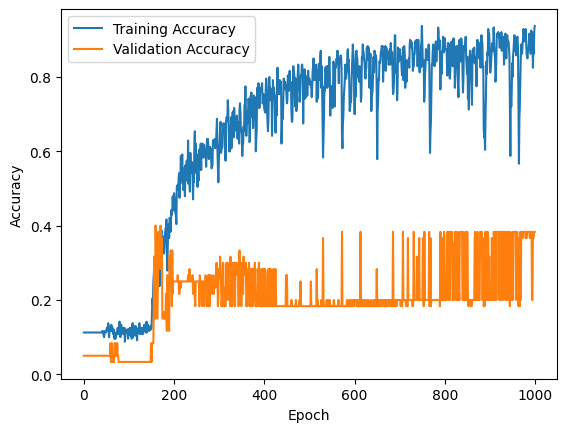

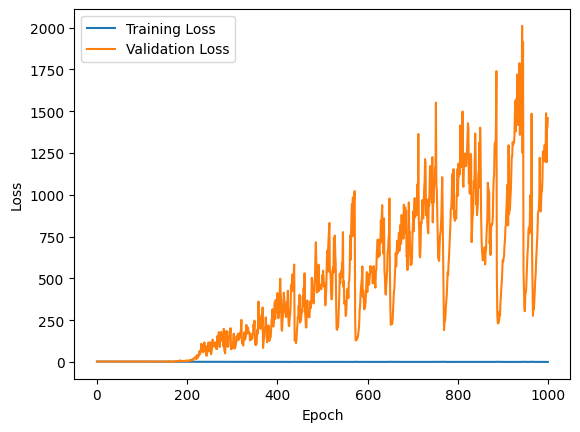

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

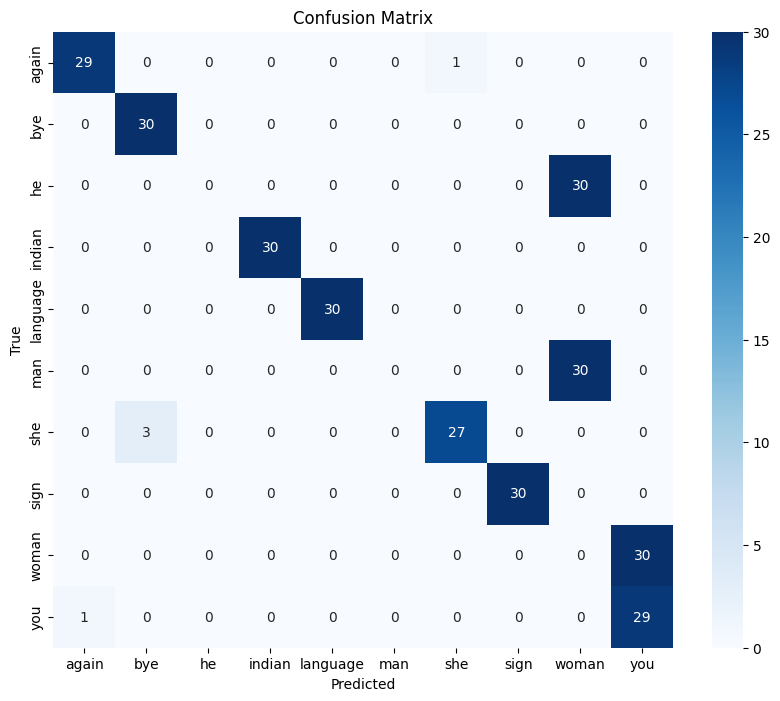

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=actions, yticklabels=actions)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()